# k-Fold Cross Validation

## Importing the libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score

## Importing the dataset

In [58]:
dataset = pd.read_csv('Social_Network_Ads.csv')

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [60]:
print(X_train)

[[4.40e+01 3.90e+04]
 [3.20e+01 1.20e+05]
 [3.80e+01 5.00e+04]
 [3.20e+01 1.35e+05]
 [5.20e+01 2.10e+04]
 [5.30e+01 1.04e+05]
 [3.90e+01 4.20e+04]
 [3.80e+01 6.10e+04]
 [3.60e+01 5.00e+04]
 [3.60e+01 6.30e+04]
 [3.50e+01 2.50e+04]
 [3.50e+01 5.00e+04]
 [4.20e+01 7.30e+04]
 [4.70e+01 4.90e+04]
 [5.90e+01 2.90e+04]
 [4.90e+01 6.50e+04]
 [4.50e+01 1.31e+05]
 [3.10e+01 8.90e+04]
 [4.60e+01 8.20e+04]
 [4.70e+01 5.10e+04]
 [2.60e+01 1.50e+04]
 [6.00e+01 1.02e+05]
 [3.80e+01 1.12e+05]
 [4.00e+01 1.07e+05]
 [4.20e+01 5.30e+04]
 [3.50e+01 5.90e+04]
 [4.80e+01 4.10e+04]
 [4.80e+01 1.34e+05]
 [3.80e+01 1.13e+05]
 [2.90e+01 1.48e+05]
 [2.60e+01 1.50e+04]
 [6.00e+01 4.20e+04]
 [2.40e+01 1.90e+04]
 [4.20e+01 1.49e+05]
 [4.60e+01 9.60e+04]
 [2.80e+01 5.90e+04]
 [3.90e+01 9.60e+04]
 [2.80e+01 8.90e+04]
 [4.10e+01 7.20e+04]
 [4.50e+01 2.60e+04]
 [3.30e+01 6.90e+04]
 [2.00e+01 8.20e+04]
 [3.10e+01 7.40e+04]
 [4.20e+01 8.00e+04]
 [3.50e+01 7.20e+04]
 [3.30e+01 1.49e+05]
 [4.00e+01 7.10e+04]
 [5.10e+01 1.

In [61]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [62]:
print(X_test)

[[3.00e+01 8.70e+04]
 [3.80e+01 5.00e+04]
 [3.50e+01 7.50e+04]
 [3.00e+01 7.90e+04]
 [3.50e+01 5.00e+04]
 [2.70e+01 2.00e+04]
 [3.10e+01 1.50e+04]
 [3.60e+01 1.44e+05]
 [1.80e+01 6.80e+04]
 [4.70e+01 4.30e+04]
 [3.00e+01 4.90e+04]
 [2.80e+01 5.50e+04]
 [3.70e+01 5.50e+04]
 [3.90e+01 7.70e+04]
 [2.00e+01 8.60e+04]
 [3.20e+01 1.17e+05]
 [3.70e+01 7.70e+04]
 [1.90e+01 8.50e+04]
 [5.50e+01 1.30e+05]
 [3.50e+01 2.20e+04]
 [3.50e+01 4.70e+04]
 [4.70e+01 1.44e+05]
 [4.10e+01 5.10e+04]
 [4.70e+01 1.05e+05]
 [2.30e+01 2.80e+04]
 [4.90e+01 1.41e+05]
 [2.80e+01 8.70e+04]
 [2.90e+01 8.00e+04]
 [3.70e+01 6.20e+04]
 [3.20e+01 8.60e+04]
 [2.10e+01 8.80e+04]
 [3.70e+01 7.90e+04]
 [5.70e+01 6.00e+04]
 [3.70e+01 5.30e+04]
 [2.40e+01 5.80e+04]
 [1.80e+01 5.20e+04]
 [2.20e+01 8.10e+04]
 [3.40e+01 4.30e+04]
 [3.10e+01 3.40e+04]
 [4.90e+01 3.60e+04]
 [2.70e+01 8.80e+04]
 [4.10e+01 5.20e+04]
 [2.70e+01 8.40e+04]
 [3.50e+01 2.00e+04]
 [4.30e+01 1.12e+05]
 [2.70e+01 5.80e+04]
 [3.70e+01 8.00e+04]
 [5.20e+01 9.

In [63]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

In [64]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [65]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [66]:
print(X_test)

[[-0.54748976  0.5130727 ]
 [ 0.15442019 -0.61825566]
 [-0.10879604  0.14615539]
 [-0.54748976  0.26846116]
 [-0.10879604 -0.61825566]
 [-0.81070599 -1.53554892]
 [-0.45975102 -1.68843113]
 [-0.0210573   2.25592989]
 [-1.60035469 -0.0678797 ]
 [ 0.94406888 -0.83229075]
 [-0.54748976 -0.6488321 ]
 [-0.72296725 -0.46537345]
 [ 0.06668145 -0.46537345]
 [ 0.24215893  0.20730828]
 [-1.4248772   0.48249625]
 [-0.37201227  1.43036596]
 [ 0.06668145  0.20730828]
 [-1.51261594  0.45191981]
 [ 1.64597884  1.8278597 ]
 [-0.10879604 -1.47439603]
 [-0.10879604 -0.70998498]
 [ 0.94406888  2.25592989]
 [ 0.41763642 -0.58767922]
 [ 0.94406888  1.06344865]
 [-1.16166097 -1.29093738]
 [ 1.11954637  2.16420057]
 [-0.72296725  0.5130727 ]
 [-0.63522851  0.2990376 ]
 [ 0.06668145 -0.25133835]
 [-0.37201227  0.48249625]
 [-1.33713846  0.54364914]
 [ 0.06668145  0.26846116]
 [ 1.82145632 -0.31249124]
 [ 0.06668145 -0.52652633]
 [-1.07392223 -0.37364412]
 [-1.60035469 -0.55710277]
 [-1.24939971  0.32961404]
 

## Training the Kernel SVM model on the Training set

In [67]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Predicting a new result

In [68]:
print(classifier.predict(sc.transform([[30, 87_000]])))

[0]


## Predicting the Test set results

In [69]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [70]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

## Applying k-Fold Cross Validation

In [71]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


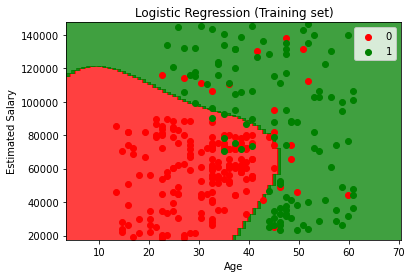

In [72]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


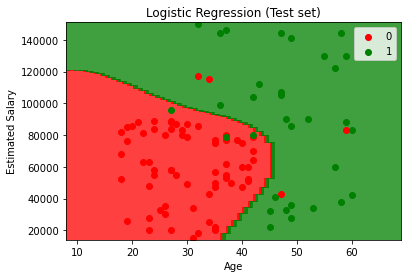

In [73]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
